# STEP-1 Reading and understanding data

In [114]:
#Loading important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
import warnings
warnings.filterwarnings('ignore')

In [116]:
bikesharing_df = pd. read_csv('day (1).csv')
bikesharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [117]:
bikesharing_df.shape

(730, 16)

In [118]:
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [119]:
bikesharing_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

It can be seen that there is no missing value in the data.

In [120]:
bikesharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Dropping the columns that are not useful

In [121]:
bikesharing_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [122]:
bikesharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Mapping the categorical variables

In [123]:
bikesharing_df ['season']= bikesharing_df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [124]:
bikesharing_df['weekday'] = bikesharing_df['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [125]:
bikesharing_df['mnth'] = bikesharing_df['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [126]:
bikesharing_df['weathersit'] = bikesharing_df['weathersit'].map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [127]:
bikesharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# STEP-2 Data Visualisation

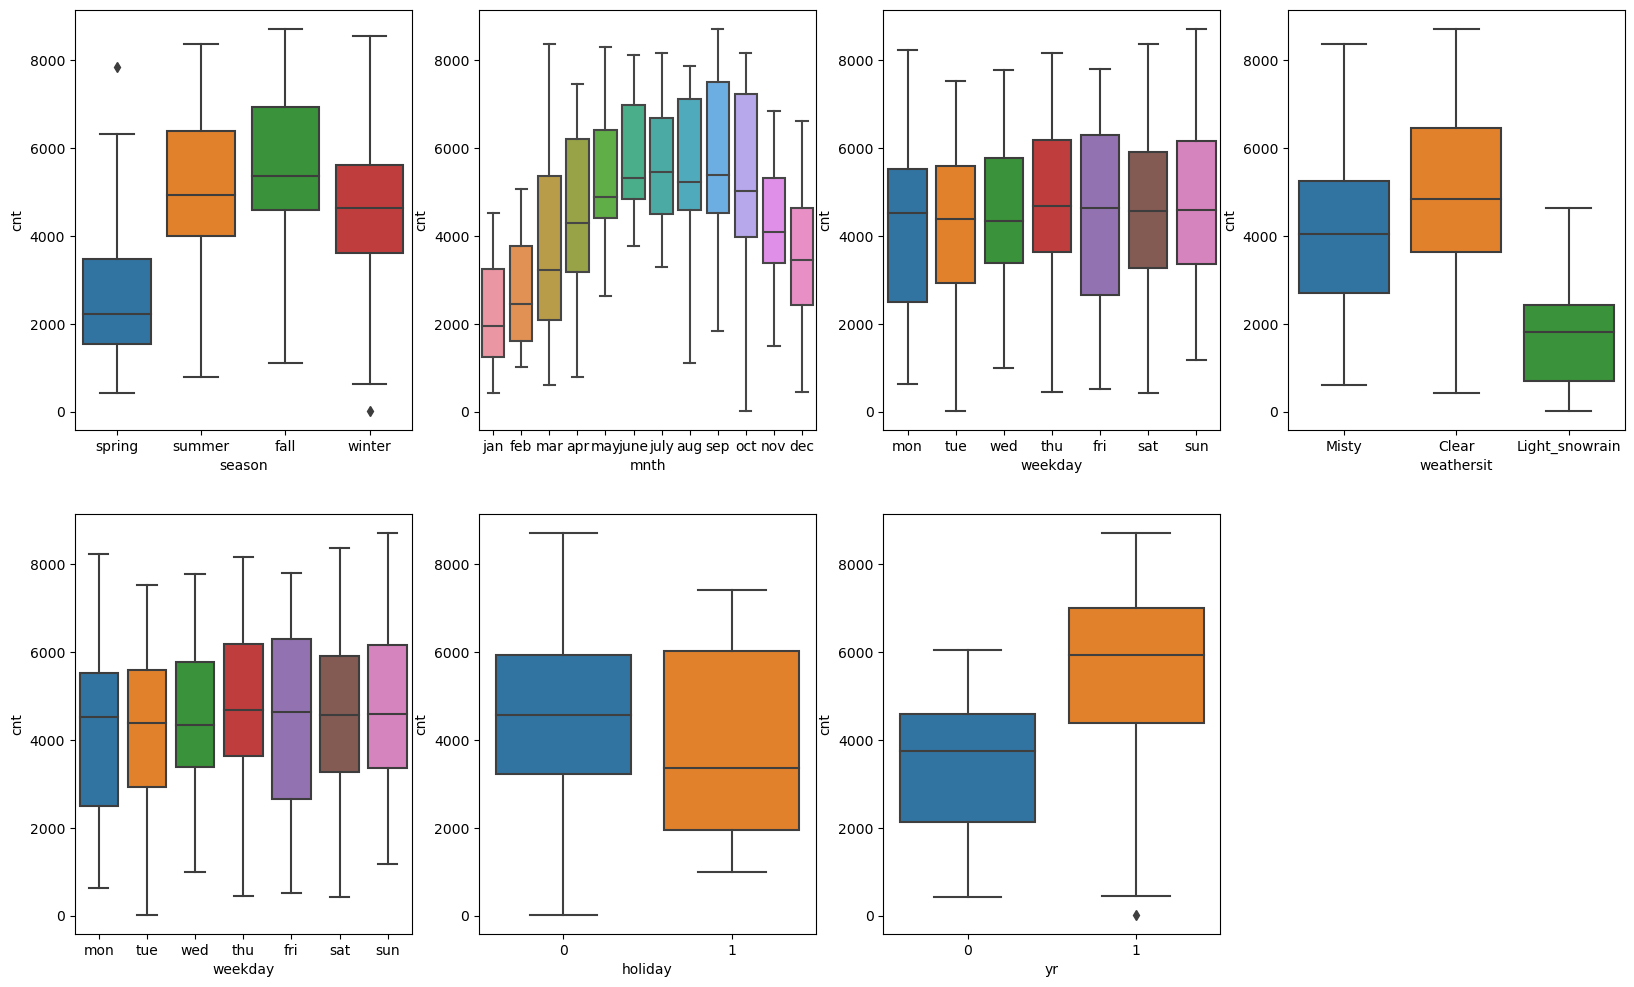

In [128]:
plt.figure(figsize = (20,12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharing_df)
plt.show()


#### INFERENCES:
    1. It can be observed from the data that fall season has high demand for the bikes, as compared to other times of the year.
    2. The month of september has high demand for bikes followed by october and august.
    3. There is high chance of a person to rent bike on friday.
    4. People are more likely to rent a bike on clear day.
    5. less bikes are rented on holiday
    6. More bikes were rented in 2019 as compared to 2018.

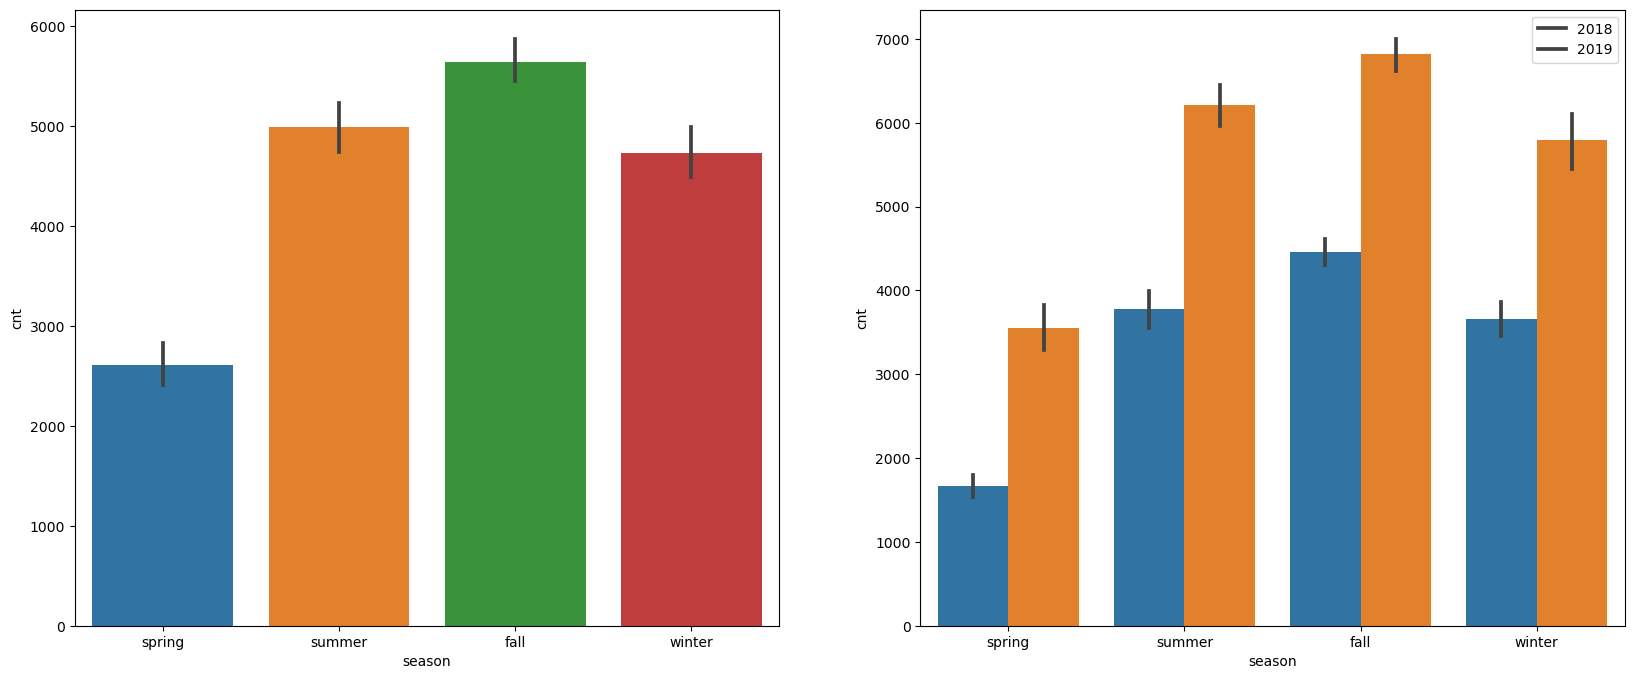

In [129]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.barplot(x = 'season', y = 'cnt', data = bikesharing_df)
plt.subplot(1,2,2)
sns.barplot(x = 'season', y = 'cnt', hue = 'yr', data = bikesharing_df)
plt.legend(labels=['2018', '2019'])
plt.show()

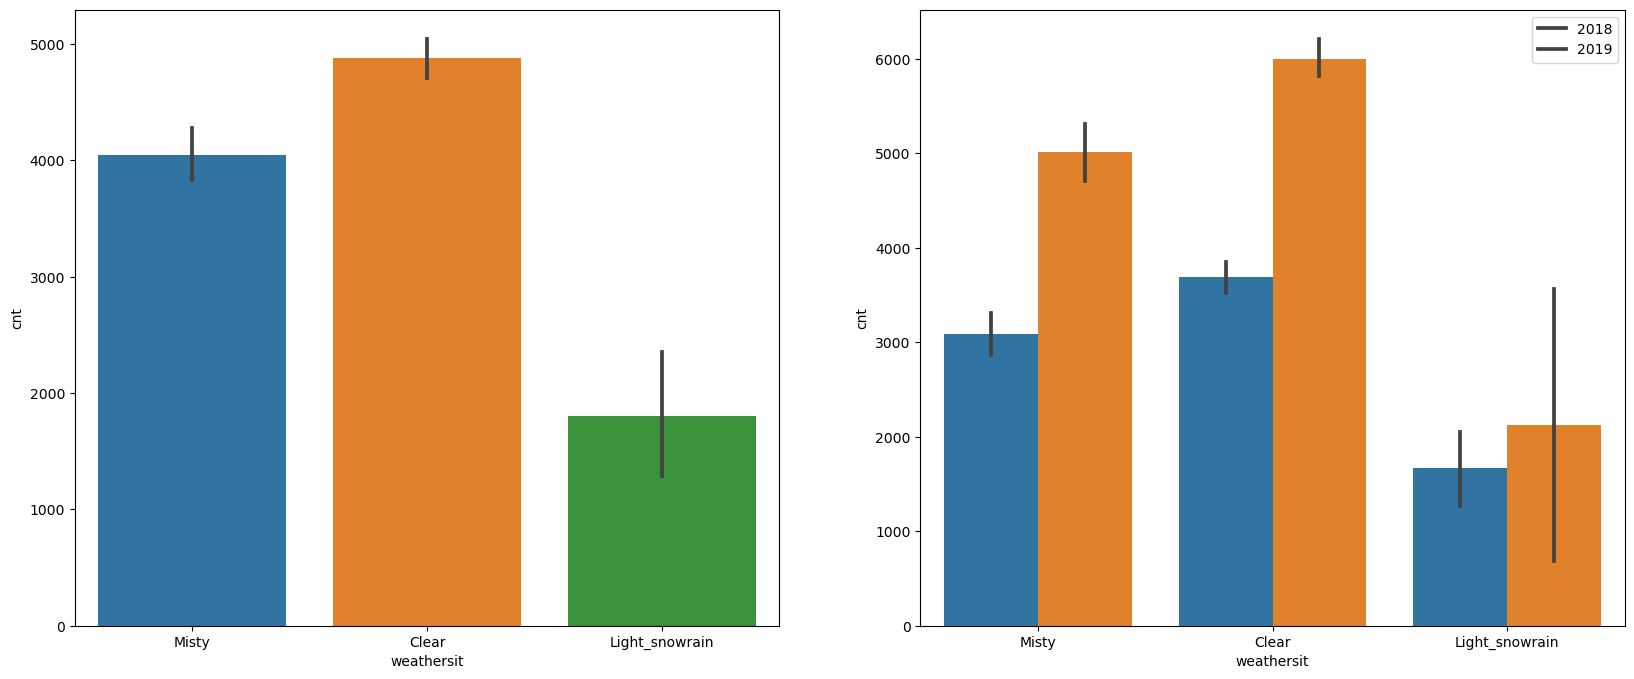

In [130]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.barplot(x = 'weathersit', y = 'cnt', data = bikesharing_df)
plt.subplot(1,2,2)
sns.barplot(x = 'weathersit', y = 'cnt', hue = 'yr', data = bikesharing_df)
plt.legend(labels=['2018', '2019'])
plt.show()

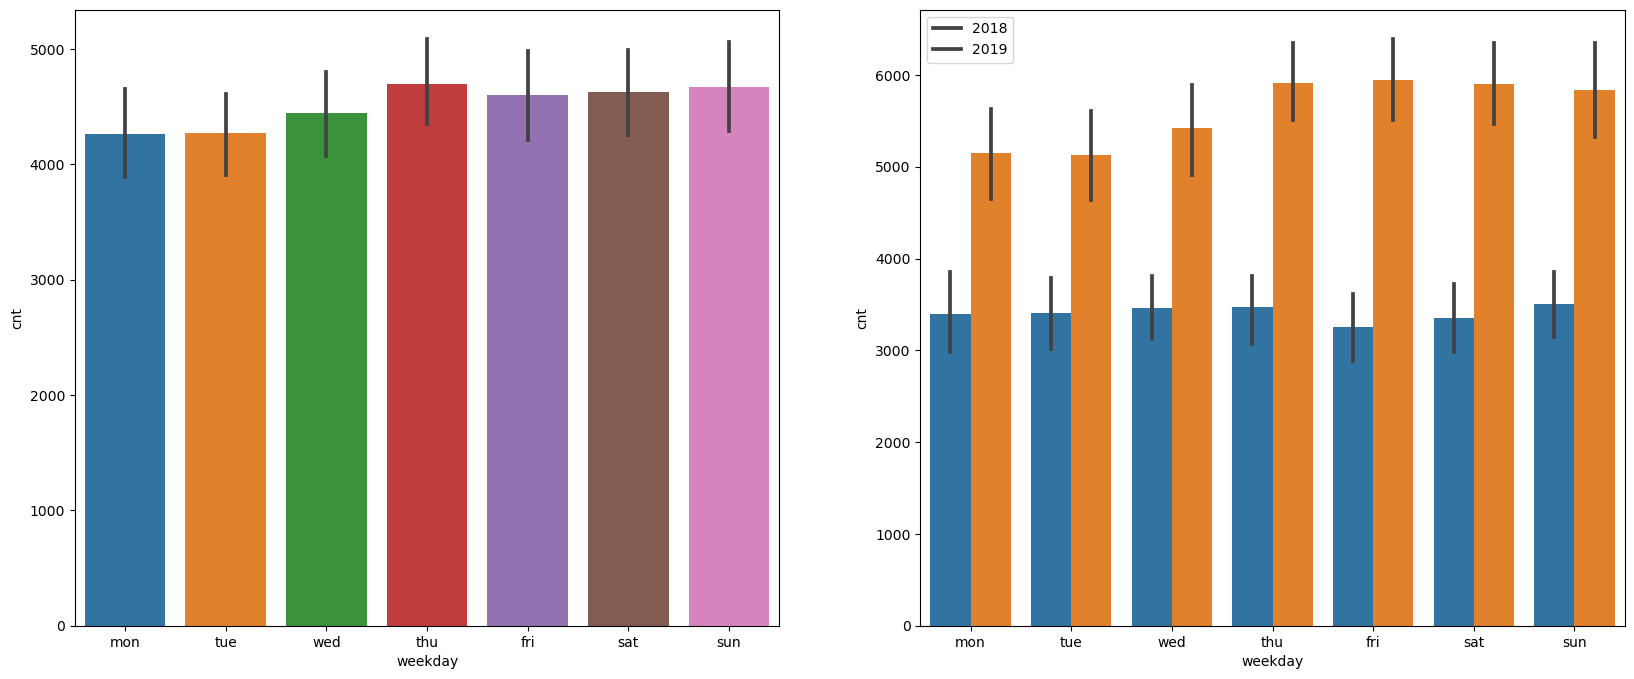

In [131]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.barplot(x = 'weekday', y = 'cnt', data = bikesharing_df)
plt.subplot(1,2,2)
sns.barplot(x = 'weekday', y = 'cnt', hue = 'yr', data = bikesharing_df)
plt.legend(labels=['2018', '2019'])
plt.show()

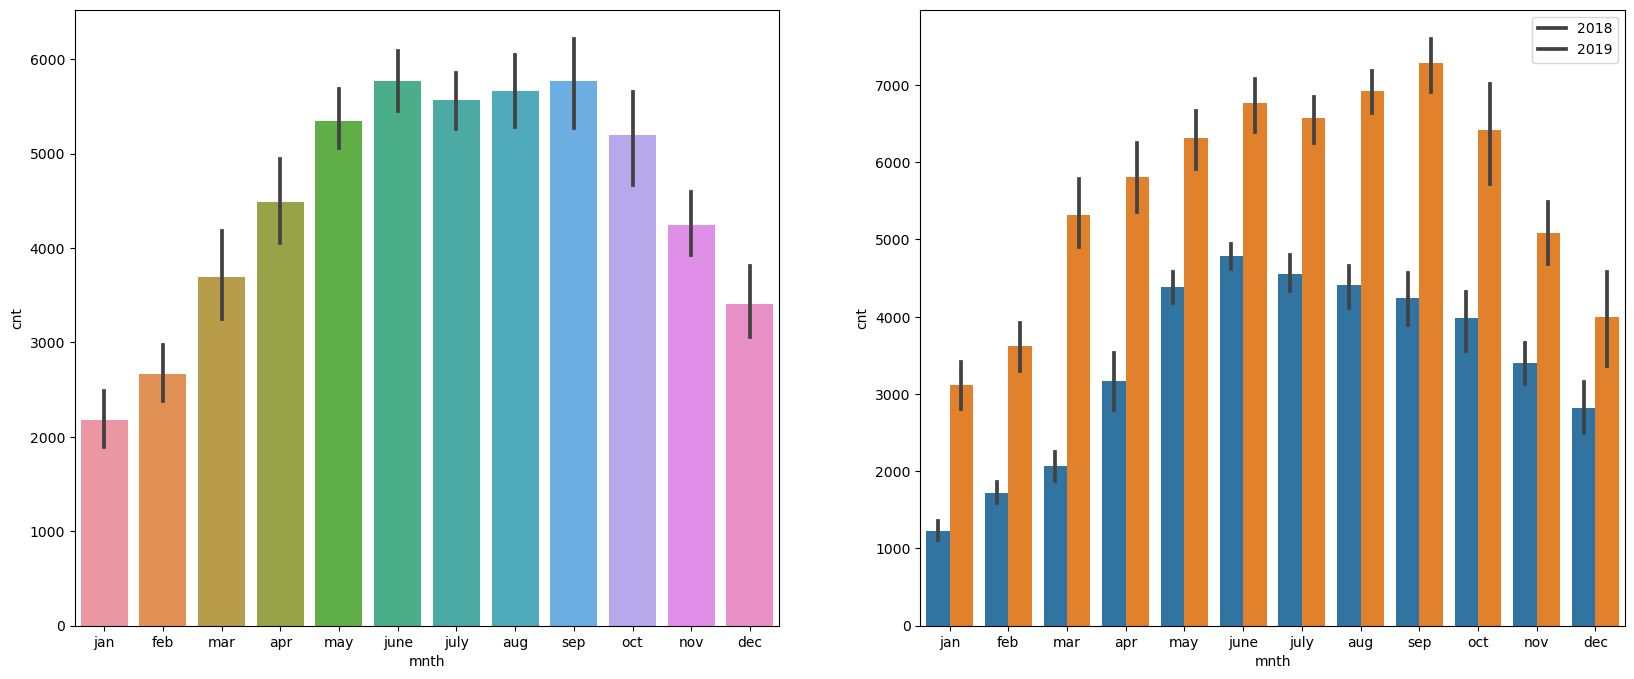

In [132]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.barplot(x = 'mnth', y = 'cnt', data = bikesharing_df)
plt.subplot(1,2,2)
sns.barplot(x = 'mnth', y = 'cnt', hue = 'yr', data = bikesharing_df)
plt.legend(labels=['2018', '2019'])
plt.show()

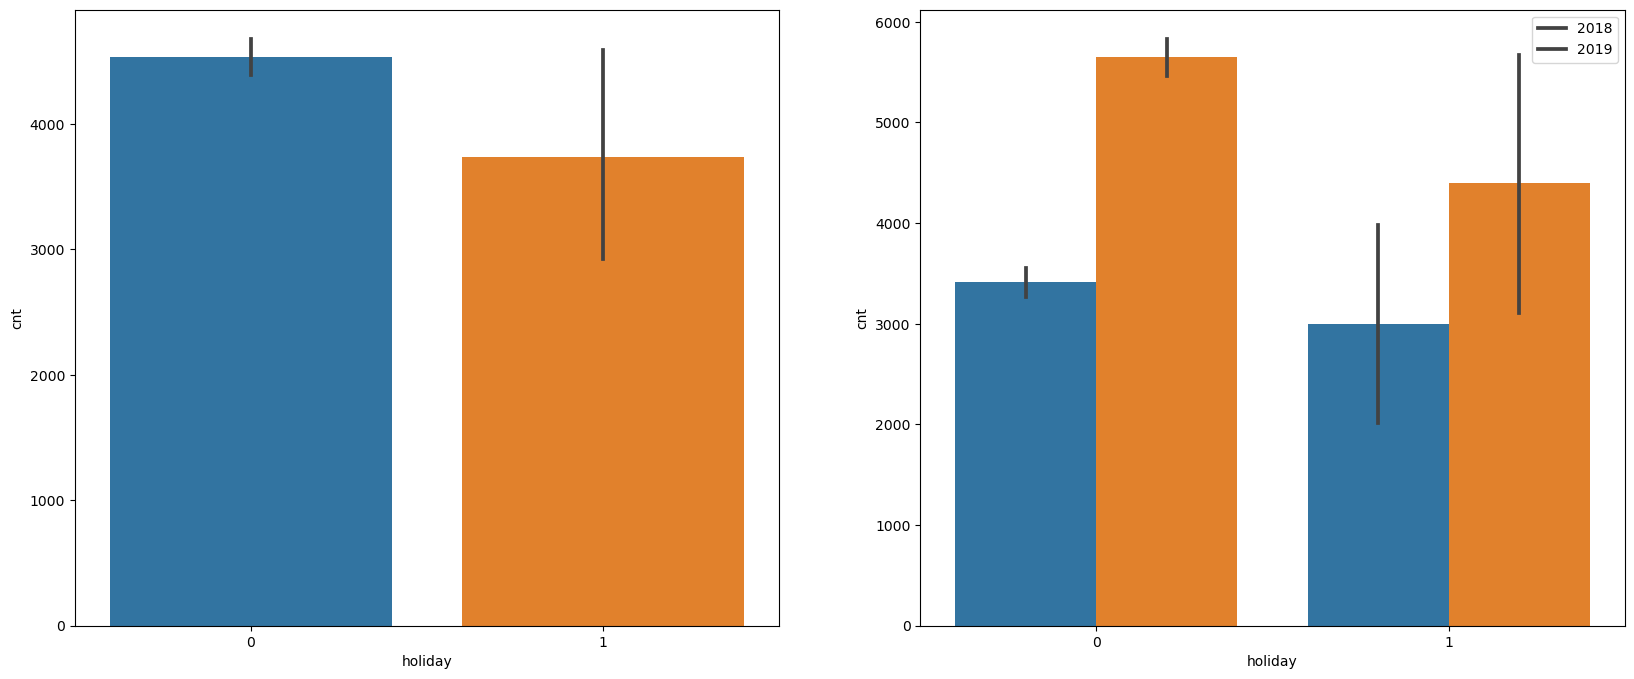

In [133]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.barplot(x = 'holiday', y = 'cnt', data = bikesharing_df)
plt.subplot(1,2,2)
sns.barplot(x = 'holiday', y = 'cnt', hue = 'yr', data = bikesharing_df)
plt.legend(labels=['2018', '2019'])
plt.show()

#### It can be seen from the above data that bookings have heavily increased in 2019 as compared to that of 2018.

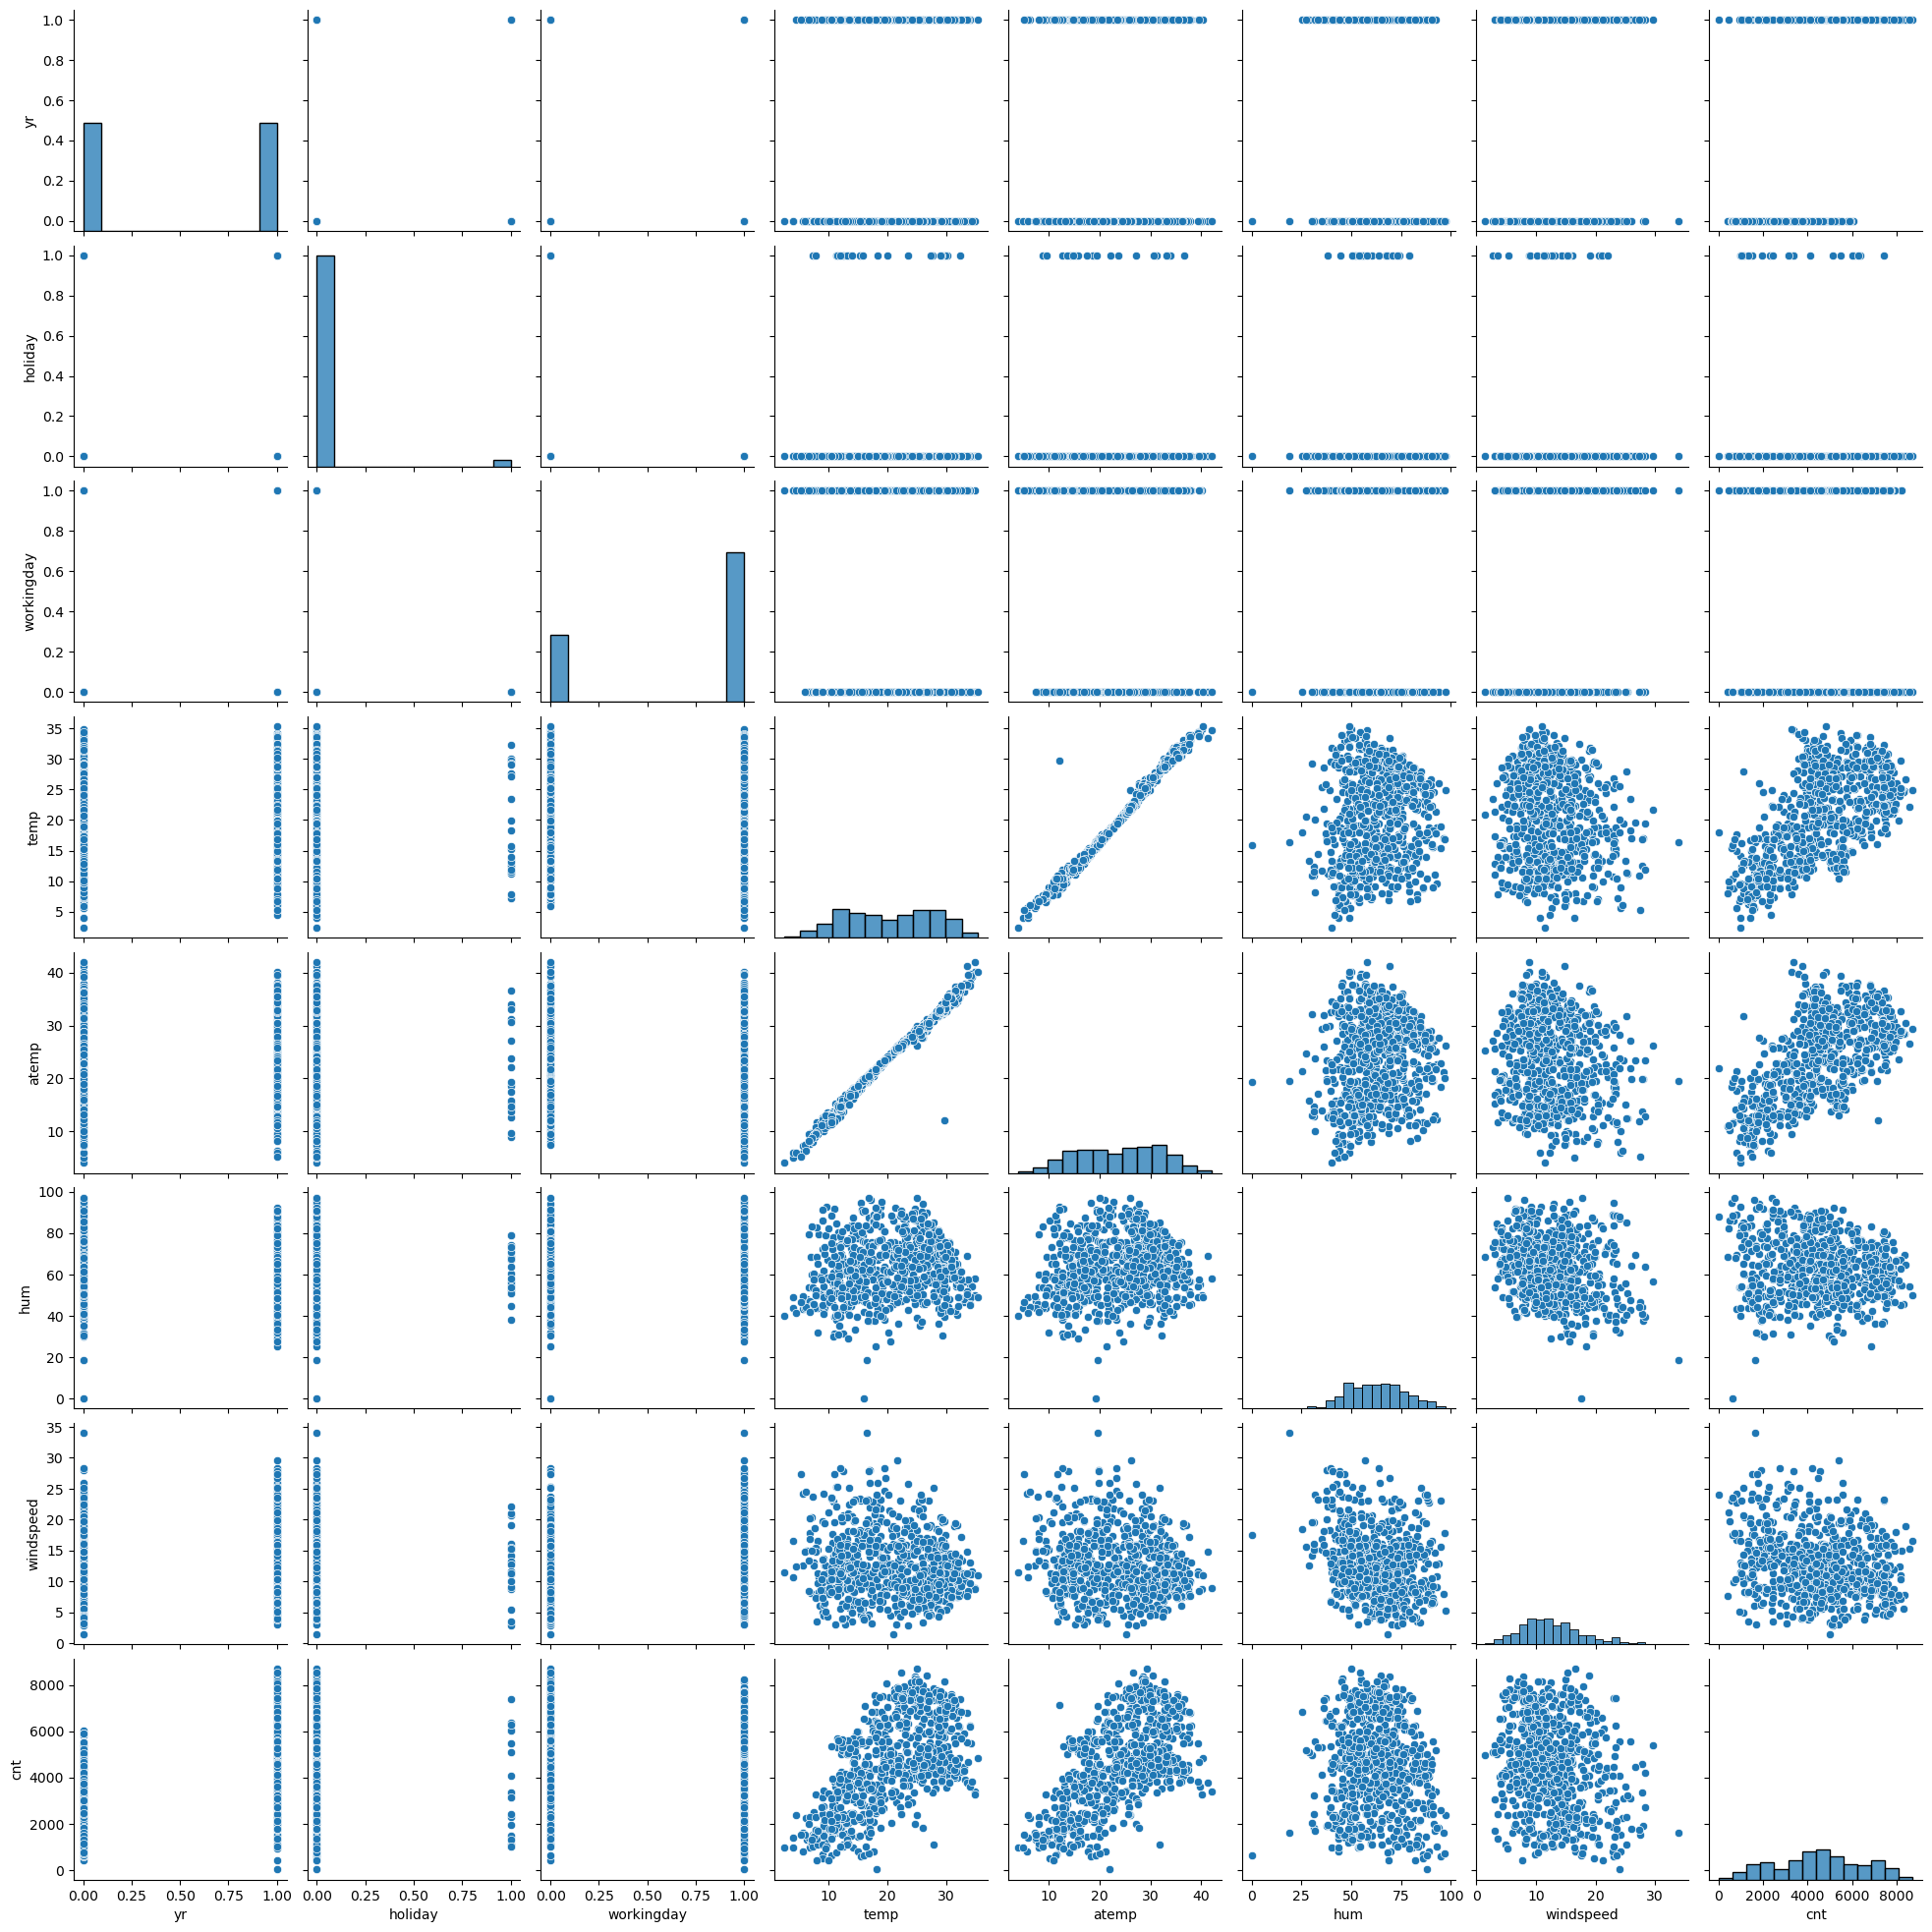

In [134]:
sns.pairplot(data = bikesharing_df)
plt.show()

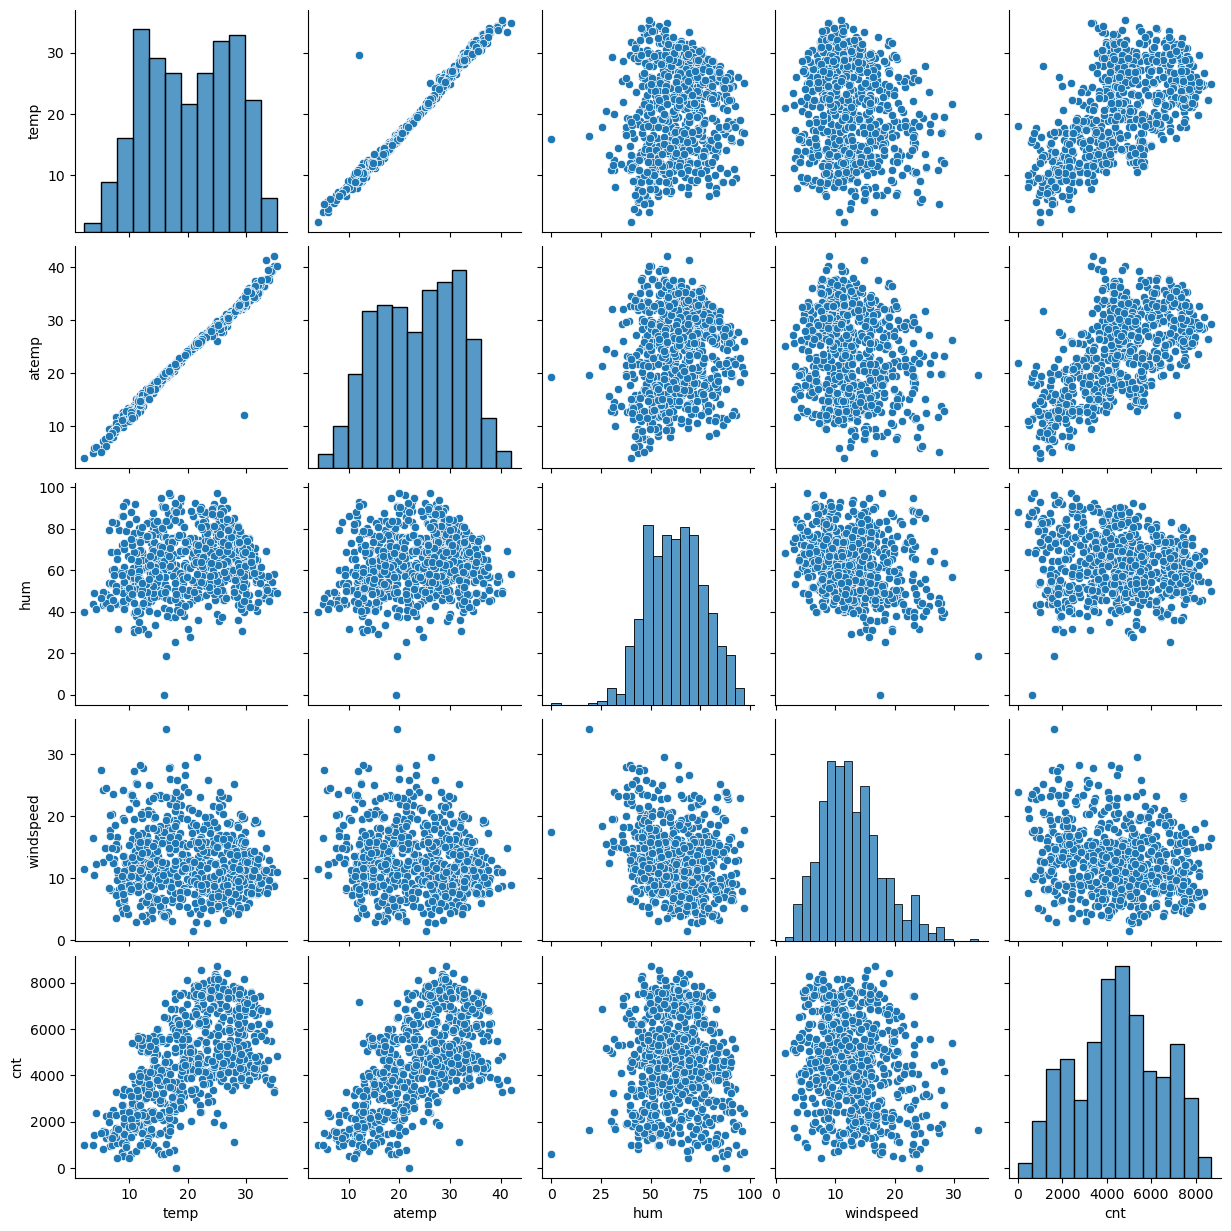

In [135]:
sns.pairplot(data = bikesharing_df, vars = ['temp','atemp','hum','windspeed','cnt'])
plt.show()

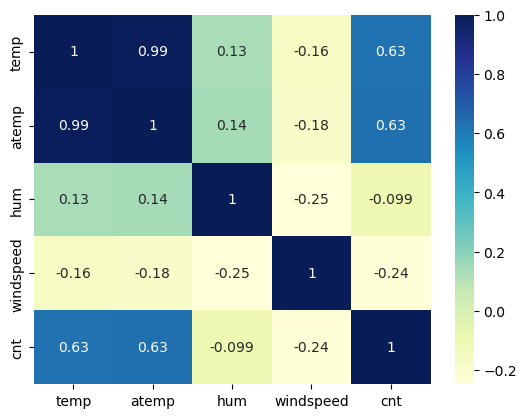

In [136]:
sns.heatmap(bikesharing_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot = True, cmap="YlGnBu")
plt.show()

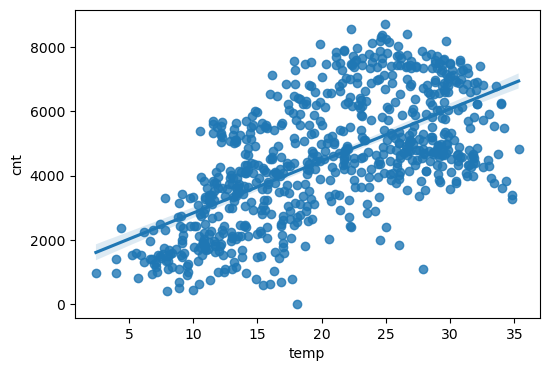

In [137]:
plt.figure(figsize=(6,4))
sns.regplot(x='temp', y ='cnt', data = bikesharing_df)
plt.show()

#### Demand for the bikes seems to be positively related with the temperature and shows linear relationship.

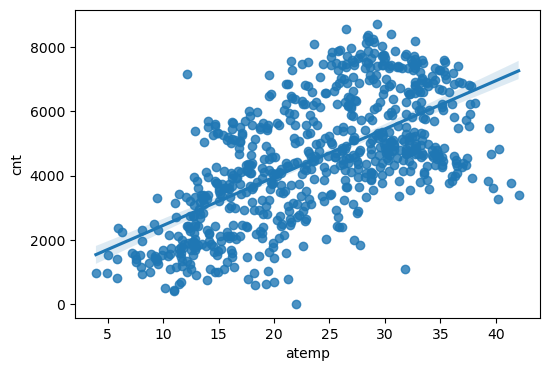

In [138]:
plt.figure(figsize=(6,4))
sns.regplot(x='atemp', y ='cnt', data = bikesharing_df)
plt.show()

# STEP-3 Data Preparation

#### Converting categorical variables to dummy variables

In [139]:
bikesharing_df = pd.get_dummies(bikesharing_df, columns=['season', 'mnth', 'weekday', 'weathersit'],drop_first=True, dtype = int)


In [140]:
bikesharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting the data into train and test set

In [141]:
import sklearn
from sklearn.model_selection import train_test_split

In [275]:
np.random.seed(0)
df_train, df_test = train_test_split(bikesharing_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [276]:
df_train.shape

(510, 30)

In [277]:
from sklearn.preprocessing import MinMaxScaler

In [278]:
scaler = MinMaxScaler()

In [279]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [280]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [281]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


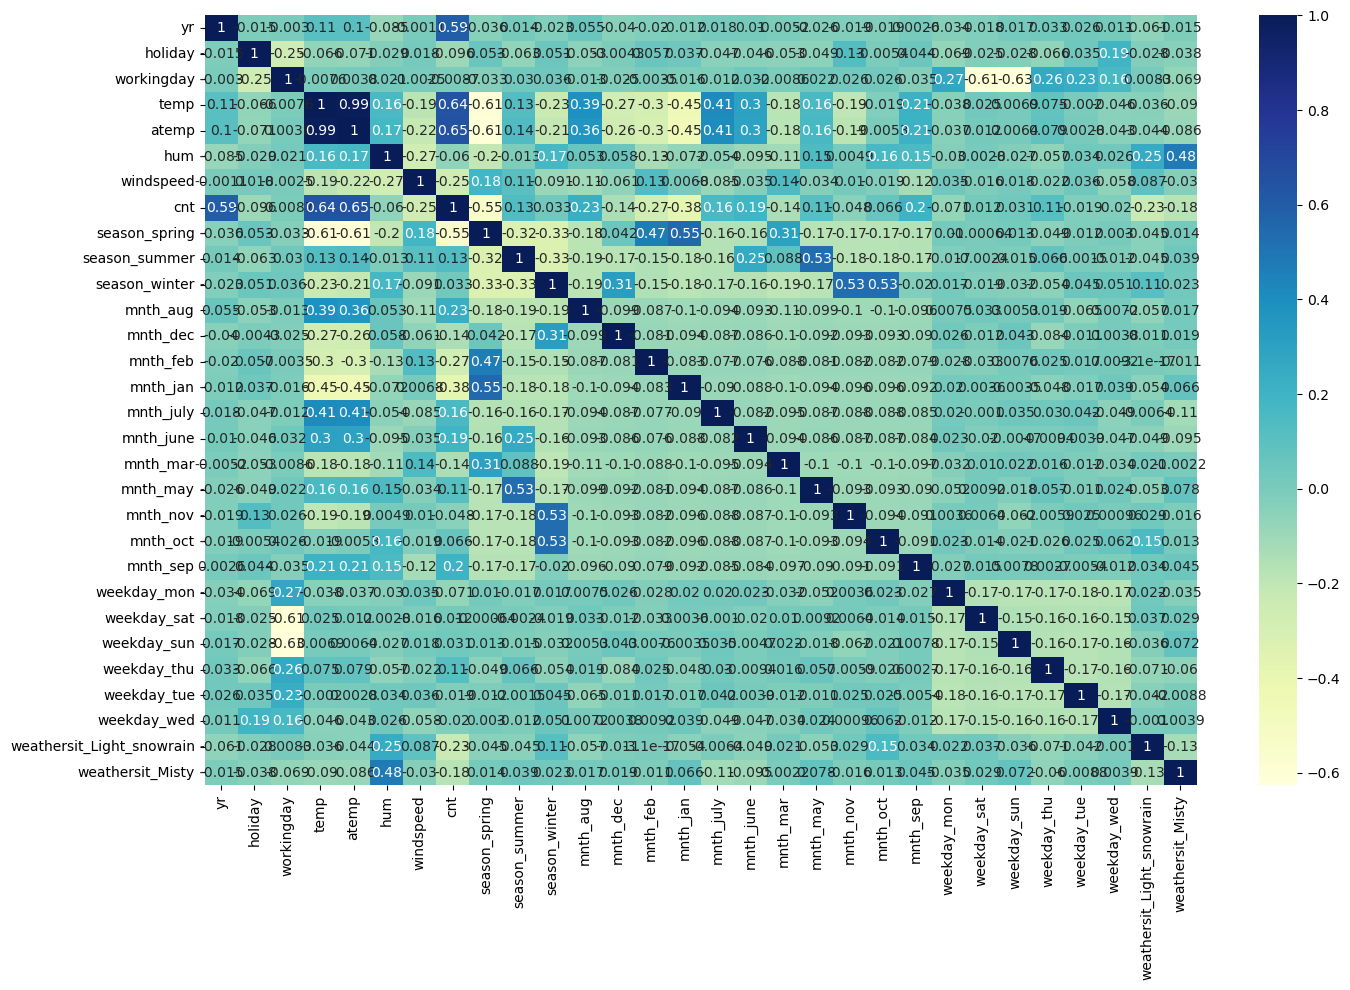

In [282]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Dividing x and y sets

In [283]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building the model

In [284]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train[['temp']])

lr = sm.OLS(y_train, X_train_lm).fit()

In [285]:
lr.params

const    0.169798
temp     0.639952
dtype: float64

In [286]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           5.80e-61
Time:                        21:06:11   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.000       0.131       0.208
temp           0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Adding another variable of atemp

In [287]:
X_train_lm = sm.add_constant(X_train[['temp', 'atemp']])

lr =sm.OLS(y_train, X_train_lm).fit()

In [288]:
lr.params

const    0.163383
temp     0.181818
atemp    0.492316
dtype: float64

In [289]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.5
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           1.95e-60
Time:                        21:06:17   Log-Likelihood:                 176.81
No. Observations:                 510   AIC:                            -347.6
Df Residuals:                     507   BIC:                            -334.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1634      0.020      8.215      0.000       0.124       0.202
temp           0.1818      0.233      0.779      0.436      -0.277       0.640
atemp          0.4923      0.248      1.984      0.048       0.005       0.980
==============================================================================
Omnibus:                        4.934   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                3.720
Skew:                           0.079   Prob(JB):                        0.156
Kurtosis:                       2.612   Cond. No.                         56.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Creating a model using all the variables

In [290]:
X_train_1 = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_1).fit()

In [291]:
lr_1.params

const                        0.394765
yr                           0.230933
holiday                     -0.135245
workingday                  -0.060878
temp                         0.400268
atemp                        0.046419
hum                         -0.157757
windspeed                   -0.181137
season_spring               -0.044097
season_summer                0.041756
season_winter                0.110482
mnth_aug                     0.023034
mnth_dec                    -0.045685
mnth_feb                    -0.037177
mnth_jan                    -0.063451
mnth_july                   -0.033912
mnth_june                    0.002144
mnth_mar                     0.000805
mnth_may                     0.024765
mnth_nov                    -0.041530
mnth_oct                     0.005922
mnth_sep                     0.086720
weekday_mon                 -0.024668
weekday_sat                 -0.056309
weekday_sun                 -0.050307
weekday_thu                  0.003841
weekday_tue 

In [292]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     94.48
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          4.09e-178
Time:                        21:07:21   Log-Likelihood:                 523.87
No. Observations:                 510   AIC:                            -987.7
Df Residuals:                     480   BIC:                            -860.7
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.3948      0.085      4.638      0.000       0.228       0.562
yr                            0.2309      0.008     28.359      0.000       0.215       0.247
holiday                      -0.1352      0.065     -2.068      0.039      -0.264      -0.007
workingday                   -0.0609      0.071     -0.856      0.392      -0.201       0.079
temp                          0.4003      0.143      2.790      0.005       0.118       0.682
atemp                         0.0464      0.139      0.333      0.739      -0.227       0.320
hum                          -0.1578      0.039     -4.054      0.000      -0.234      -0.081
windspeed                    -0.1811      0.027     -6.793      0.000      -0.234      -0.129
season_spring                -0.0441      0.030     -1.455      0.146      -0.104       0.015
season_summer                 0.0418      0.027      1.575      0.116      -0.010       0.094
season_winter                 0.1105      0.028      3.915      0.000       0.055       0.166
mnth_aug                      0.0230      0.034      0.671      0.503      -0.044       0.091
mnth_dec                     -0.0457      0.034     -1.347      0.178      -0.112       0.021
mnth_feb                     -0.0372      0.033     -1.117      0.265      -0.103       0.028
mnth_jan                     -0.0635      0.034     -1.873      0.062      -0.130       0.003
mnth_july                    -0.0339      0.036     -0.953      0.341      -0.104       0.036
mnth_june                     0.0021      0.026      0.084      0.933      -0.048       0.052
mnth_mar                      0.0008      0.025      0.032      0.974      -0.048       0.050
mnth_may                      0.0248      0.021      1.161      0.246      -0.017       0.067
mnth_nov                     -0.0415      0.037     -1.131      0.259      -0.114       0.031
mnth_oct                      0.0059      0.036      0.164      0.870      -0.065       0.077
mnth_sep                      0.0867      0.032      2.680      0.008       0.023       0.150
weekday_mon                  -0.0247      0.015     -1.691      0.091      -0.053       0.004
weekday_sat                  -0.0563      0.072     -0.786      0.432      -0.197       0.084
weekday_sun                  -0.0503      0.072     -0.703      0.482      -0.191       0.090
weekday_thu                   0.0038      0.015      0.257      0.798      -0.026       0.033
weekday_tue                  -0.0263      0.015     -1.794      0.074      -0.055       0.003
weekday_wed                  -0.0112      0.015     -0.736      0.462      -0.041       0.019
weathersit_Light_snowrain    -0.2509      0.027     -9.402      0.000      -0.303      -0.198
weathersit_Misty             -0.0593      0.011     -5.627      0.000      

In [293]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [294]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,442.82
4,atemp,382.51
2,workingday,63.90
5,hum,41.21
7,season_spring,13.56
9,season_winter,12.53
23,weekday_sun,12.35
22,weekday_sat,11.84
8,season_summer,9.87
18,mnth_nov,7.16


# Model building using RFE

In [295]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [296]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [297]:
rfe = RFE(lr, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [298]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 10),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 14),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 7),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 12),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', False, 4),
 ('weekday_sun', False, 5),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 11),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1)]

In [299]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_july',
       'mnth_nov', 'mnth_sep', 'weathersit_Light_snowrain',
       'weathersit_Misty'],
      dtype='object')

In [300]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_aug', 'mnth_feb', 'mnth_june', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [301]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [302]:
X_train_rfe = X_train[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_july',
       'mnth_nov', 'mnth_sep', 'weathersit_Light_snowrain',
       'weathersit_Misty']]

In [303]:
calculateVIF(X_train_rfe)

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.81
14,weathersit_Misty,2.32
0,yr,2.09
11,mnth_nov,1.83
9,mnth_jan,1.75


### Linear model 1

In [304]:
X_train_lm1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          3.34e-189
Time:                        21:07:56   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Linear model 2

In [305]:
X_train_rfe_1 = X_train_rfe.drop(['hum'], axis =1)

In [306]:
calculateVIF(X_train_rfe_1)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_winter,2.94
4,season_spring,2.89
5,season_summer,2.23
0,yr,2.07
10,mnth_nov,1.80
8,mnth_jan,1.66
9,mnth_july,1.59
13,weathersit_Misty,1.56


In [307]:
X_train_lm2 = sm.add_constant(X_train_rfe_1)
lr_2 = sm.OLS(y_train,X_train_lm2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          1.57e-186
Time:                        21:08:02   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Linear model 3

In [308]:
X_train_rfe_2 = X_train_rfe_1.drop(['mnth_nov'], axis =1)

In [309]:
X_train_lm3 = sm.add_constant(X_train_rfe_2)
lr_3 = sm.OLS(y_train,X_train_lm3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          1.20e-186
Time:                        21:08:05   Log-Likelihood:                 503.13
No. Observations:                 510   AIC:                            -978.3
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Linear model 4

In [310]:
X_train_rfe_3 = X_train_rfe_2.drop(['mnth_dec'], axis =1)

In [311]:
X_train_lm4 = sm.add_constant(X_train_rfe_3)
lr_4 = sm.OLS(y_train,X_train_lm4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          3.97e-187
Time:                        21:08:13   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Linear model 5

In [312]:
X_train_rfe_4 = X_train_rfe_3.drop(['mnth_july'], axis =1)

In [313]:
X_train_lm5 = sm.add_constant(X_train_rfe_4)
lr_5 = sm.OLS(y_train,X_train_lm5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.8
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          1.01e-186
Time:                        21:08:18   Log-Likelihood:                 497.69
No. Observations:                 510   AIC:                            -971.4
Df Residuals:                     498   BIC:                            -920.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Linear model 6

In [314]:
X_train_rfe_5 = X_train_rfe_4.drop(['mnth_sep'], axis =1)

In [315]:
X_train_lm6 = sm.add_constant(X_train_rfe_5)
lr_6 = sm.OLS(y_train,X_train_lm6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.7
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          1.67e-181
Time:                        21:08:27   Log-Likelihood:                 482.51
No. Observations:                 510   AIC:                            -943.0
Df Residuals:                     499   BIC:                            -896.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

# Residual analysis

In [331]:
y_train_pred = lr_6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

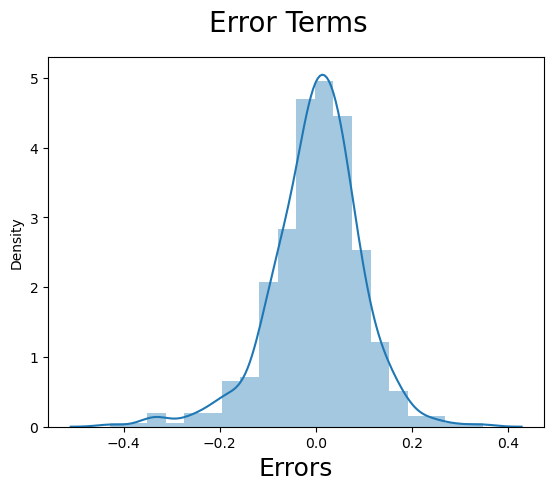

In [332]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)       

# Making predictions

In [322]:
#transforming numerical vriables
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [323]:
#getting the test dataset
y_test = df_test.pop('cnt')
X_test = df_test

In [333]:
X_test_new = X_test[X_train_rfe_5.columns]
X_test_new = sm.add_constant(X_test_new)

In [334]:
X_test_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan',
       'weathersit_Light_snowrain', 'weathersit_Misty'],
      dtype='object')

In [335]:
y_pred = lr_6.predict(X_test_new)

In [327]:
from sklearn.metrics import r2_score


In [336]:
#calculating R2 score
r2_score(y_train, y_train_pred)

0.8246874576027333

In [337]:
r2_score(y_test, y_pred)

0.7849542859708

Text(0, 0.5, 'y_pred')

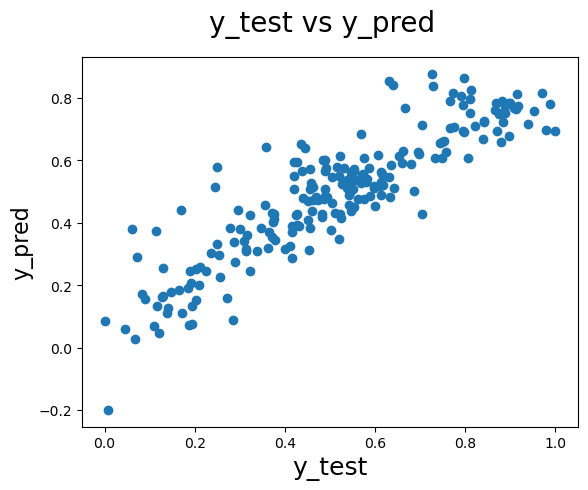

In [338]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [339]:
lr_6.params

const                        0.240100
yr                           0.234801
holiday                     -0.087088
temp                         0.446204
windspeed                   -0.162380
season_spring               -0.076390
season_summer                0.033372
season_winter                0.068934
mnth_jan                    -0.042712
weathersit_Light_snowrain   -0.280863
weathersit_Misty            -0.075445
dtype: float64

## cnt = 0.2401 + 2.348 X year - 0.087 X holiday + 0.4462 X temp - 0.162 X windspeed -0.07 X season_spring + 0.03 X Season_summer + 0.068 Season_winter - 0.04 X mnth_jan - 0.2808 Weathersit_Light_Snowrain - 0.0754 X Weathersit_Misty